In [10]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

import sys; sys.path.append("..") # Adds parent directory to python modules path.
from topdown_parsers import *

In [ ]:
# read in the files
census_nums = gpd.read_file("./dallas_block_shape/dallas_blocks_recon.shp")
new_recons = pd.read_csv("new_dallas_reconstructions.csv")

compare_cols = ['HISP', 'VAP', 'HVAP', 'NH_WHITE', 'NH_BLACK', 'NH_AMIN',
                'NH_ASIAN', 'NH_PI', 'NH_OTHER', 'NH_WVAP', 'NH_BVAP', 
                'NH_AMINVAP', 'NH_ASIANVAP', 'NH_PIVAP', 'NH_OTHERVAP', 
                'TOTPOP']

In [ ]:
# Keep only columns we want, and name them to match `compare_cols`
census_nums = census_nums[['GEOID10',
                           'TOTPOP10',
                           'NH_WHITE10',
                           'NH_BLACK10',
                           'NH_AMIN10',
                           'NH_ASIAN10',
                           'NH_NHPI10',
                           'NH_OTHER10',
                           'NH_2MORE10',
                           'HISP10',
                           'VAP10',
                           'HVAP10',
                           'WVAP10',
                           'BVAP10',
                           'AMINVAP10',
                           'ASIANVAP10',
                           'NHPIVAP10',
                           'OTHERVAP10',
                           '2MOREVAP10']]

census_nums["NH_OTHER"] = census_nums["NH_OTHER10"] + census_nums["NH_2MORE10"]
census_nums["NH_OTHERVAP"] = census_nums["OTHERVAP10"] + census_nums["2MOREVAP10"]
census_nums = census_nums.drop(columns=["NH_OTHER10", "NH_2MORE10", "OTHERVAP10", "2MOREVAP10"])

census_nums = census_nums.rename(columns={"TOTPOP10": "TOTPOP",
                                          "NH_WHITE10": "NH_WHITE",
                                          "NH_BLACK10": "NH_BLACK",
                                          "NH_AMIN10": "NH_AMIN",
                                          "NH_ASIAN10": "NH_ASIAN",
                                          "NH_NHPI10": "NH_PI",
                                          "HISP10": "HISP",
                                          "VAP10": "VAP",
                                          "HVAP10": "HVAP",
                                          "WVAP10": "NH_WVAP",
                                          "BVAP10": "NH_BVAP",
                                          "AMINVAP10": "NH_AMINVAP",
                                          "ASIANVAP10": "NH_ASIANVAP",
                                          "NHPIVAP10": "NH_PIVAP",
                                          })

census_nums

In [4]:
# name reconstructions columns to match `compare_cols`
new_recons = new_recons.rename(columns={"NH_WHITEPOP": "NH_WHITE",
                                        "NH_BLACKPOP": "NH_BLACK",
                                        "NH_AMINPOP": "NH_AMIN",
                                        "NH_ASIANPOP": "NH_ASIAN",
                                        "NH_OTHERPOP": "NH_OTHER",
                                        "NH_HAWAIIANPOP": "NH_PI",
                                        "NH_HAWAIIANVAP": "NH_PIVAP"
                                        })
new_recons = new_recons.drop(columns=["male", "female"])

new_recons

,GEOID,HISP,VAP,HVAP,NH_WHITE,NH_BLACK,NH_AMIN,NH_ASIAN,NH_PI,NH_OTHER,NH_WVAP,NH_BVAP,NH_AMINVAP,NH_ASIANVAP,NH_PIVAP,NH_OTHERVAP,TOTPOP
0,481130001001001,0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2
1,481130001001004,2,45.0,2.0,62.0,0.0,0.0,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,64
2,481130001001006,132,441.0,90.0,307.0,38.0,0.0,20.0,1.0,9.0,291.0,35.0,0.0,15.0,1.0,9.0,507
3,481130001001007,13,124.0,10.0,100.0,14.0,1.0,3.0,0.0,2.0,94.0,14.0,1.0,3.0,0.0,2.0,133
4,481130001001008,0,12.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25800,481130207003026,41,211.0,22.0,199.0,17.0,1.0,5.0,0.0,1.0,172.0,12.0,0.0,4.0,0.0,1.0,264
25801,481130207003028,2,24.0,1.0,25.0,3.0,0.0,1.0,0.0,0.0,20.0,3.0,0.0,0.0,0.0,0.0,31
25802,481139801001022,0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,4
25803,481139801001042,4,5.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5


In [5]:
# the reconstructions only have the blocks that are populated, so we merge them to get the blocks with 0 pop and
# then uncouple the dataframes again.
new_recons["GEOID"] = new_recons["GEOID"].astype(str)
census_nums["GEOID10"] = census_nums["GEOID10"].astype(str)
combined = pd.merge(census_nums, new_recons, left_on="GEOID10", right_on="GEOID", how="left").fillna(0)
combined

,GEOID10,TOTPOP_x,NH_WHITE_x,NH_BLACK_x,NH_AMIN_x,NH_ASIAN_x,NH_PI_x,HISP_x,VAP_x,HVAP_x,NH_WVAP_x,NH_BVAP_x,NH_AMINVAP_x,NH_ASIANVAP_x,NH_PIVAP_x,NH_OTHER_x,NH_OTHERVAP_x,GEOID,HISP_y,VAP_y,HVAP_y,NH_WHITE_y,NH_BLACK_y,NH_AMIN_y,NH_ASIAN_y,NH_PI_y,NH_OTHER_y,NH_WVAP_y,NH_BVAP_y,NH_AMINVAP_y,NH_ASIANVAP_y,NH_PIVAP_y,NH_OTHERVAP_y,TOTPOP_y
0,481130124005010,49,27,0,0,2,0,17,38,12,22,0,0,2,0,3,2,481130124005010,17.0,38.0,12.0,27.0,0.0,0.0,2.0,0.0,3.0,22.0,0.0,0.0,2.0,0.0,2.0,49.0
1,481130182062004,134,2,7,0,0,0,125,90,83,2,5,0,0,0,0,0,481130182062004,125.0,90.0,83.0,2.0,7.0,0.0,0.0,0.0,0.0,2.0,5.0,0.0,0.0,0.0,0.0,134.0
2,481130182061004,188,16,13,0,0,0,151,100,80,12,7,0,0,0,8,1,481130182061004,151.0,100.0,80.0,16.0,13.0,0.0,0.0,0.0,8.0,12.0,7.0,0.0,0.0,0.0,1.0,188.0
3,481130182063002,94,20,0,1,1,0,72,59,39,18,0,1,1,0,0,0,481130182063002,72.0,59.0,39.0,20.0,0.0,1.0,1.0,0.0,0.0,18.0,0.0,1.0,1.0,0.0,0.0,94.0
4,481130184021002,56,39,5,0,0,0,11,42,5,33,3,0,0,0,1,1,481130184021002,11.0,42.0,5.0,39.0,5.0,0.0,0.0,0.0,1.0,33.0,3.0,0.0,0.0,0.0,1.0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44108,481130107011063,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44109,481130107012016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44110,481130107032011,25,3,0,0,0,0,22,18,15,3,0,0,0,0,0,0,481130107032011,22.0,18.0,15.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,25.0
44111,481130107012035,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# some shenanigans to uncouple the census numbers df and the reconstructions df
census_cols = [x + "_x" for x in compare_cols]
census_rename_map = {s: s[:-2]  for s in census_cols}

recons_cols = [y + "_y" for y in compare_cols]
recons_rename_map = {s: s[:-2]  for s in recons_cols}

census_cols.append("GEOID10")
recons_cols.append("GEOID")

census_nums = combined[census_cols]
new_recons = combined[recons_cols]

census_nums = census_nums.rename(columns=census_rename_map)
new_recons = new_recons.rename(columns=recons_rename_map)

In [7]:
census_nums[compare_cols]

,HISP,VAP,HVAP,NH_WHITE,NH_BLACK,NH_AMIN,NH_ASIAN,NH_PI,NH_OTHER,NH_WVAP,NH_BVAP,NH_AMINVAP,NH_ASIANVAP,NH_PIVAP,NH_OTHERVAP,TOTPOP
0,17,38,12,27,0,0,2,0,3,22,0,0,2,0,2,49
1,125,90,83,2,7,0,0,0,0,2,5,0,0,0,0,134
2,151,100,80,16,13,0,0,0,8,12,7,0,0,0,1,188
3,72,59,39,20,0,1,1,0,0,18,0,1,1,0,0,94
4,11,42,5,39,5,0,0,0,1,33,3,0,0,0,1,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
44109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
44110,22,18,15,3,0,0,0,0,0,3,0,0,0,0,0,25
44111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
new_recons[compare_cols]

,HISP,VAP,HVAP,NH_WHITE,NH_BLACK,NH_AMIN,NH_ASIAN,NH_PI,NH_OTHER,NH_WVAP,NH_BVAP,NH_AMINVAP,NH_ASIANVAP,NH_PIVAP,NH_OTHERVAP,TOTPOP
0,17.0,38.0,12.0,27.0,0.0,0.0,2.0,0.0,3.0,22.0,0.0,0.0,2.0,0.0,2.0,49.0
1,125.0,90.0,83.0,2.0,7.0,0.0,0.0,0.0,0.0,2.0,5.0,0.0,0.0,0.0,0.0,134.0
2,151.0,100.0,80.0,16.0,13.0,0.0,0.0,0.0,8.0,12.0,7.0,0.0,0.0,0.0,1.0,188.0
3,72.0,59.0,39.0,20.0,0.0,1.0,1.0,0.0,0.0,18.0,0.0,1.0,1.0,0.0,0.0,94.0
4,11.0,42.0,5.0,39.0,5.0,0.0,0.0,0.0,1.0,33.0,3.0,0.0,0.0,0.0,1.0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44110,22.0,18.0,15.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,25.0
44111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 0, 'Attributes')

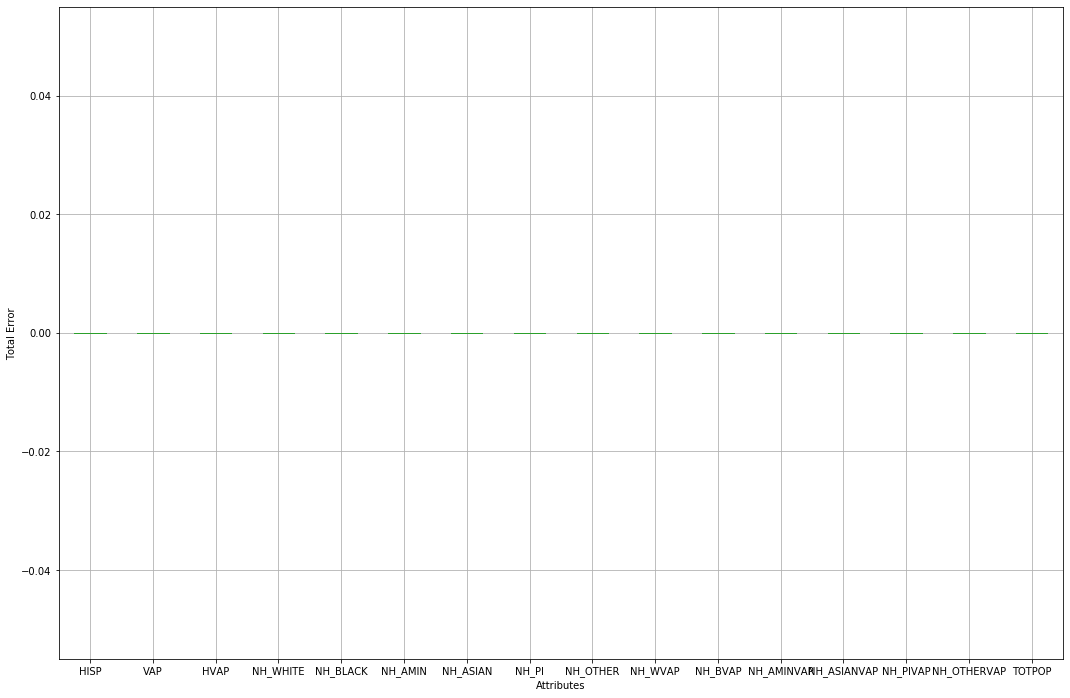

In [11]:
# this is where we compute the differences
diffs = census_nums[compare_cols] - new_recons[compare_cols]
diffs.boxplot(figsize=(18, 12))
plt.ylabel("Total Error")
plt.xlabel("Attributes")

In [ ]:
census_nums["TOTPOP"].sum()

In [ ]:
new_recons["TOTPOP"].sum()

In [ ]:
diffs

In [ ]:
diffs.sum(axis=0)